# Objective

Identify images that have bubbles.

In [4]:
from skimage import measure
from skimage import filters
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread

In [5]:
bubble_image_names = [
    'image-cropped-rescaled-20200901-193536-2',
    'image-cropped-rescaled-20200916-192532-4',
    'image-cropped-rescaled-20201002-131101-4'
]

In [6]:
names_raw = pd.read_csv('names.csv', header=None)
names = [x[0][:-4] for x in names_raw.values]

### Visual run to find intensity and connected component size thresholds

Determine a good intensity threshold for binarizing the image (so that non-bubble aberrations do not get detected as white blobs) and a good size threshold for the connected components so that only the bubbles are big enough to be identified as bubbles.

Process for each image:
- Binarize the image using intensity_thresh
- Find the connected components
- Plot the image, the blob, and the distribution of blob sizes

Observation: If there are more than 100,000 pixels in a single connected component from a binary image where the image was binarized according to a manually determined threshold of 20,000, then this image has a bubble.

image-cropped-rescaled-20200901-193536-0
20000


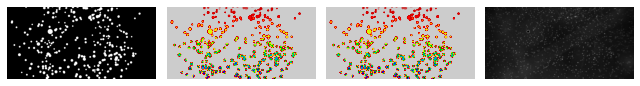

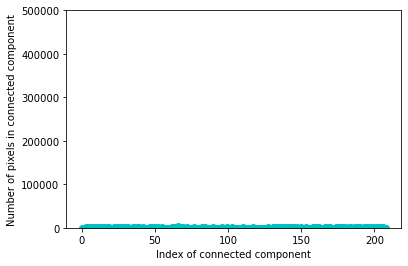

image-cropped-rescaled-20200901-193536-2
20000


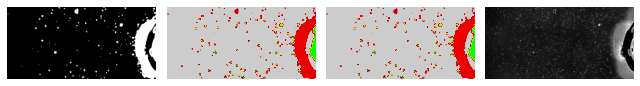

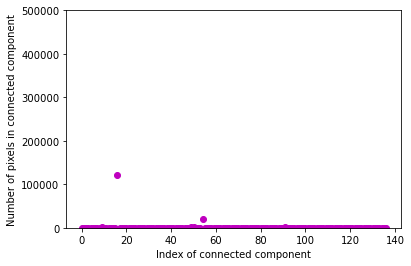

image-cropped-rescaled-20200901-193823-1
20000


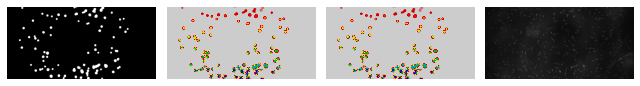

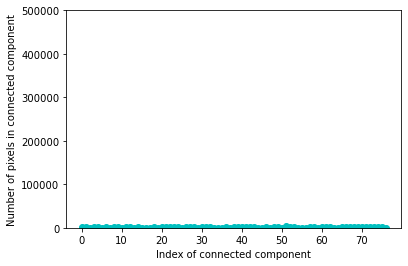

image-cropped-rescaled-20200901-193823-2
20000


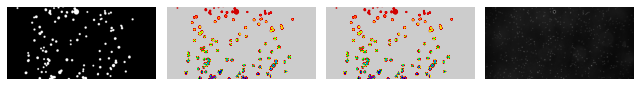

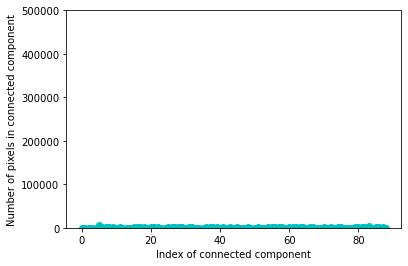

image-cropped-rescaled-20200901-193823-3
20000


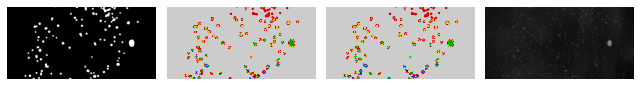

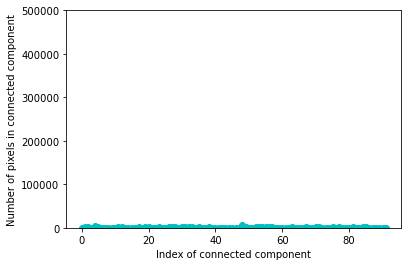

image-cropped-rescaled-20200901-193823-5
20000


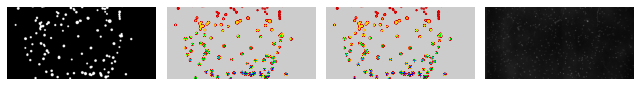

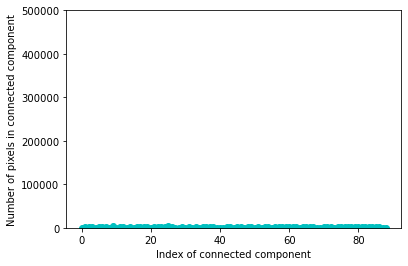

image-cropped-rescaled-20200901-193823-6
20000


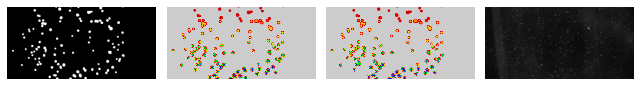

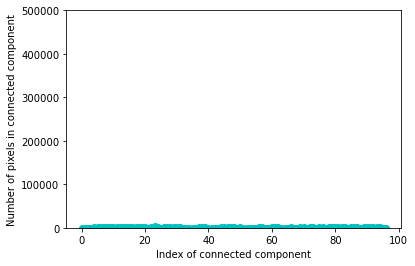

image-cropped-rescaled-20200901-194109-1
20000


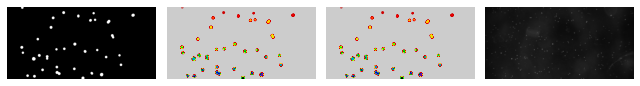

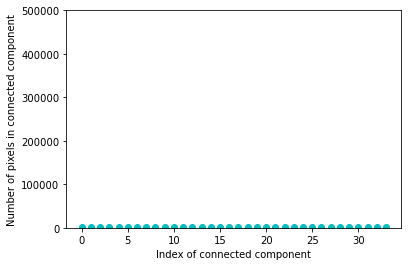

image-cropped-rescaled-20200901-194109-2
20000


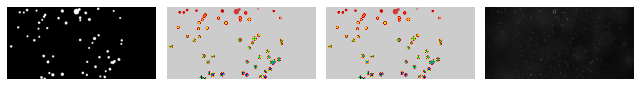

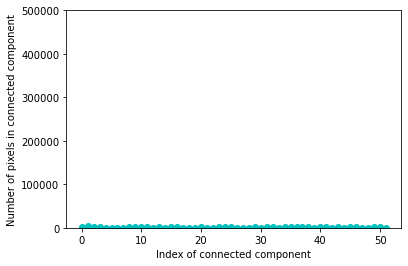

image-cropped-rescaled-20200901-194109-3
20000


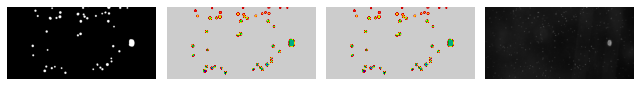

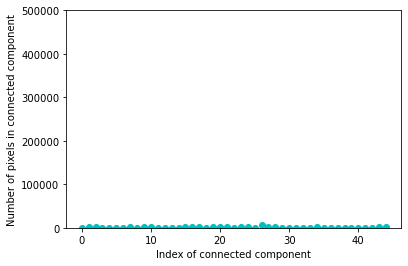

image-cropped-rescaled-20200901-194109-6
20000


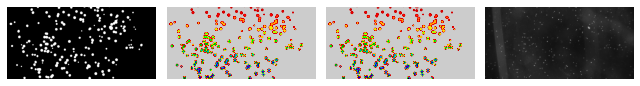

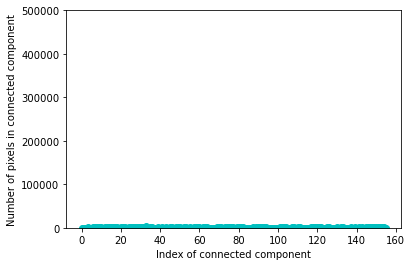

image-cropped-rescaled-20200901-194109-7
20000


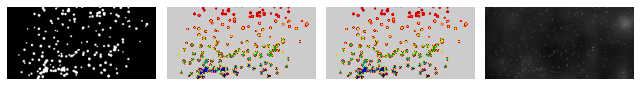

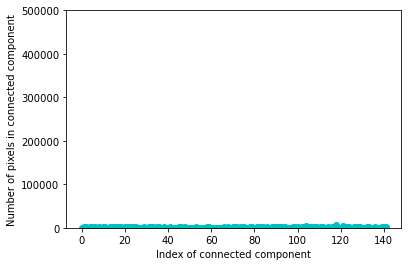

image-cropped-rescaled-20200901-194356-2
20000


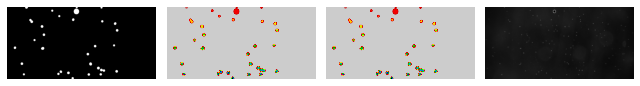

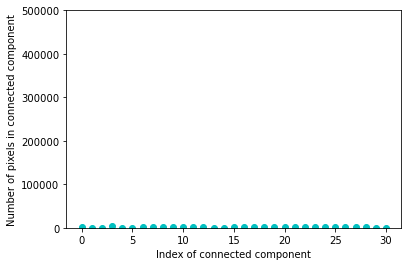

image-cropped-rescaled-20200901-194356-3
20000


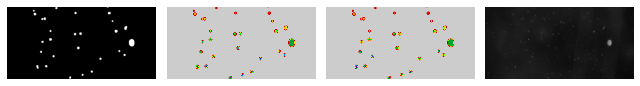

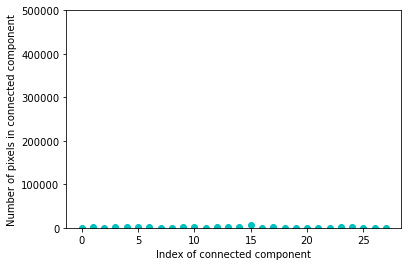

image-cropped-rescaled-20200901-194356-5
20000


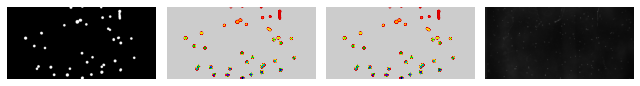

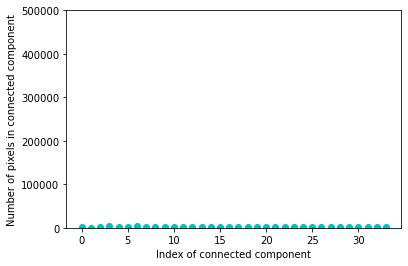

image-cropped-rescaled-20200901-194356-6
20000


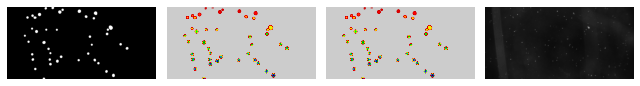

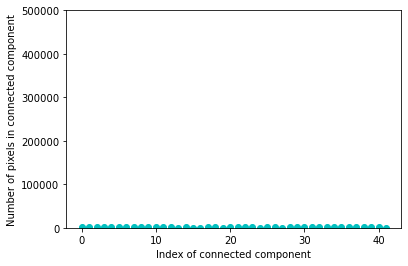

image-cropped-rescaled-20200916-192246-5
20000


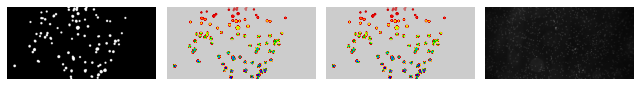

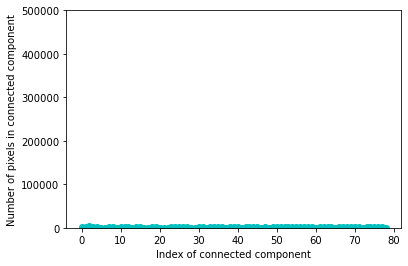

image-cropped-rescaled-20200916-192532-1
20000


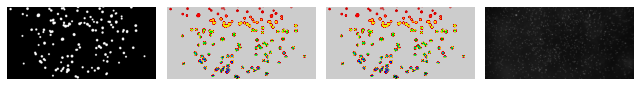

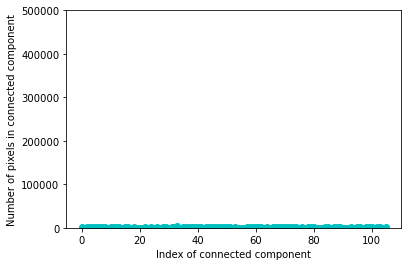

image-cropped-rescaled-20200916-192532-2
20000


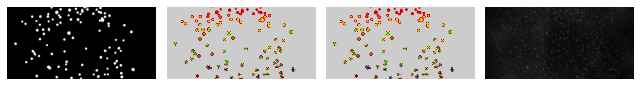

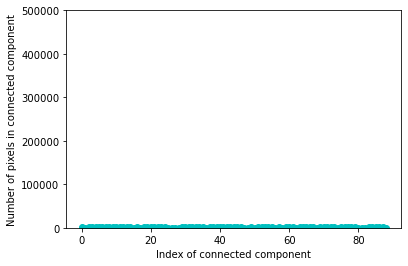

image-cropped-rescaled-20200916-192532-4
20000


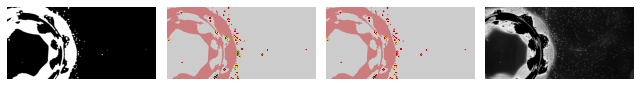

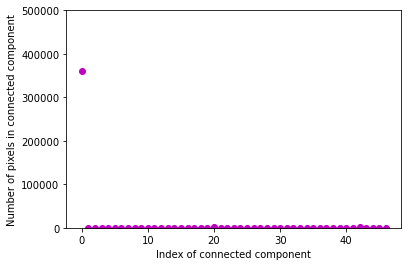

image-cropped-rescaled-20200916-192532-7
20000


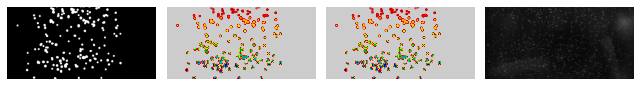

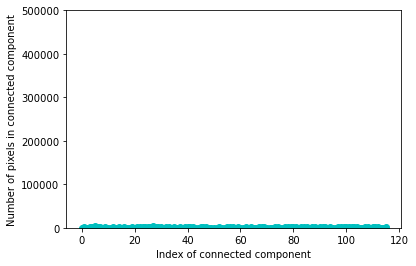

image-cropped-rescaled-20200916-200538-0
20000


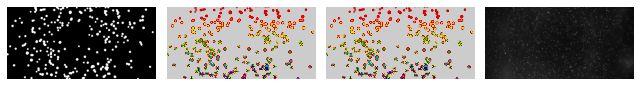

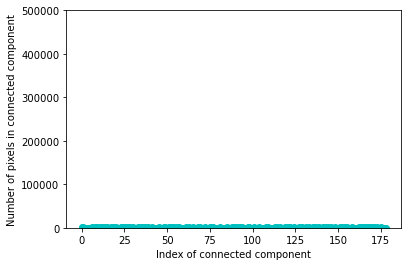

image-cropped-rescaled-20200916-200538-7
20000


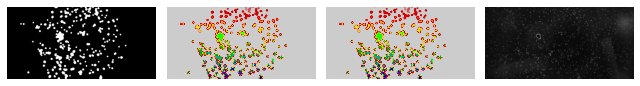

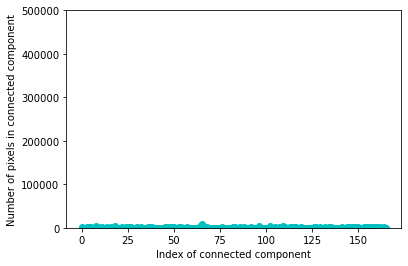

image-cropped-rescaled-20200916-200824-5
20000


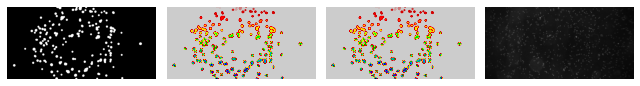

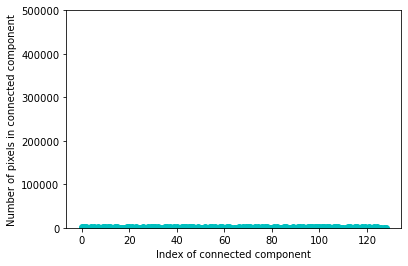

image-cropped-rescaled-20200916-201111-5
20000


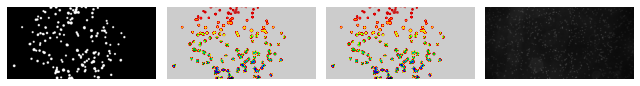

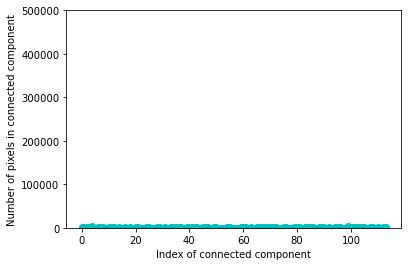

image-cropped-rescaled-20200916-201111-6
20000


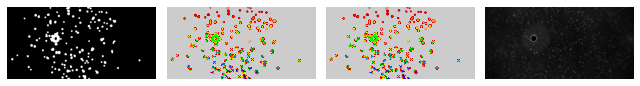

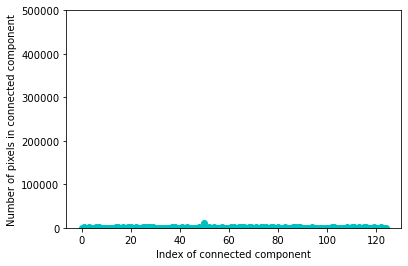

image-cropped-rescaled-20201002-125630-0
20000


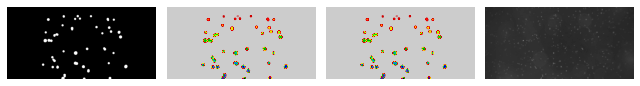

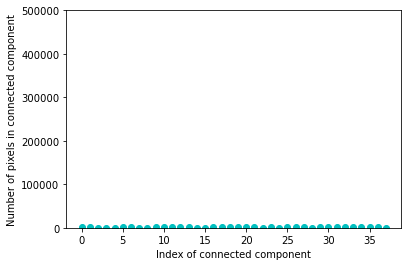

image-cropped-rescaled-20201002-125630-1
20000


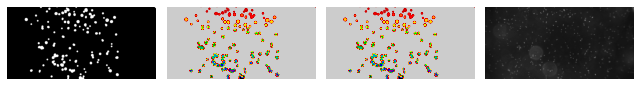

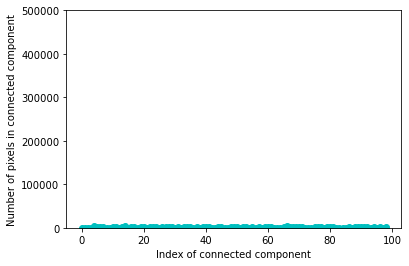

image-cropped-rescaled-20201002-125630-2
20000


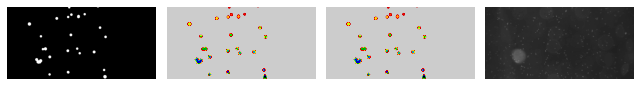

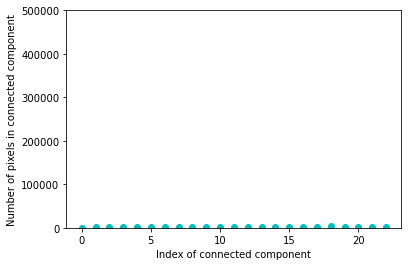

image-cropped-rescaled-20201002-125630-3
20000


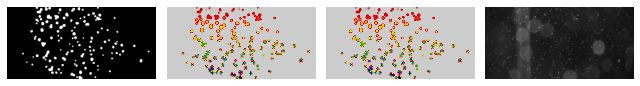

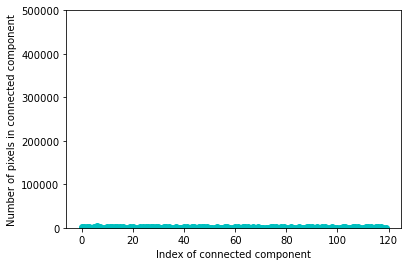

image-cropped-rescaled-20201002-125630-4
20000


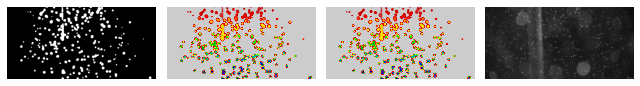

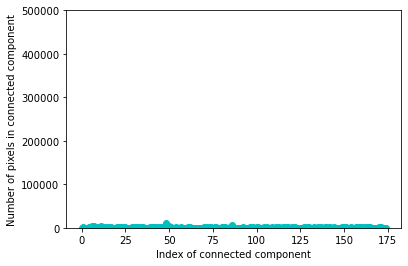

image-cropped-rescaled-20201002-125630-5
20000


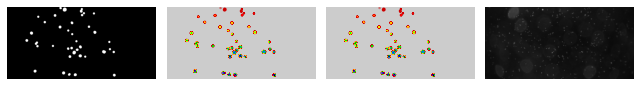

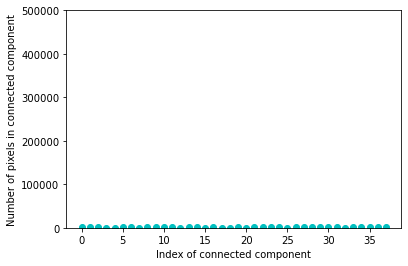

image-cropped-rescaled-20201002-125630-7
20000


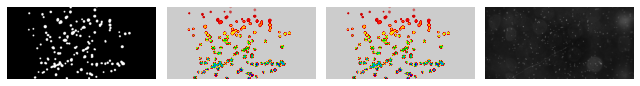

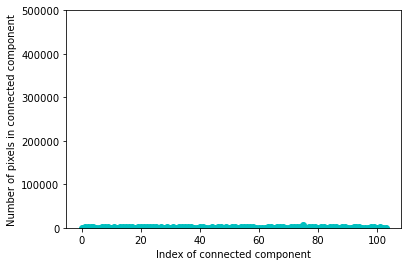

image-cropped-rescaled-20201002-131101-1
20000


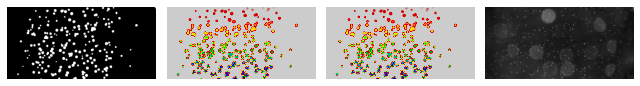

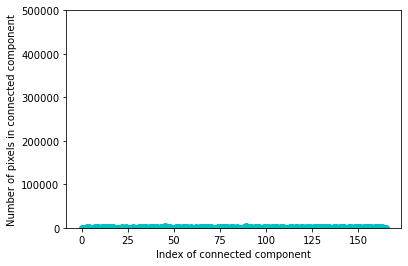

image-cropped-rescaled-20201002-131101-2
20000


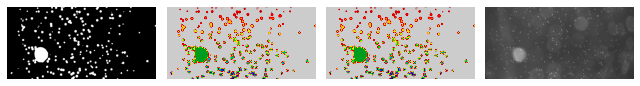

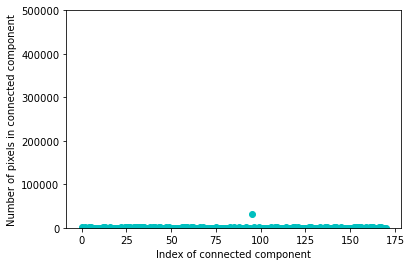

image-cropped-rescaled-20201002-131101-3
20000


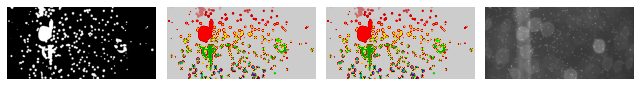

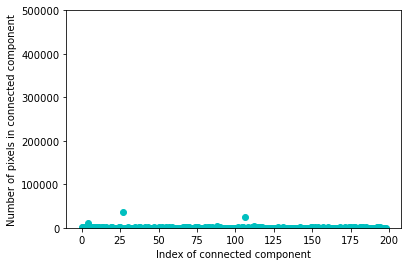

image-cropped-rescaled-20201002-131101-4
20000


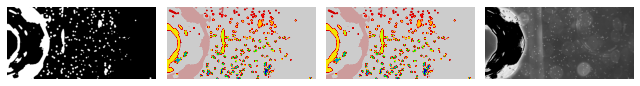

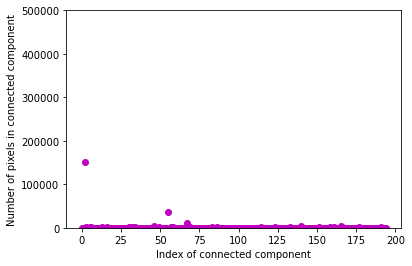

image-cropped-rescaled-20201002-131101-7
20000


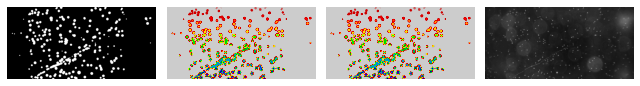

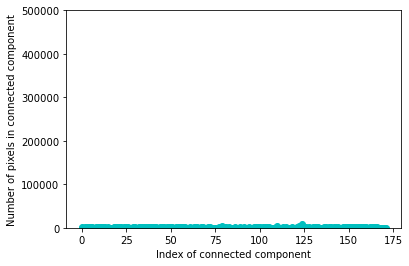

image-cropped-rescaled-20201002-132522-1
20000


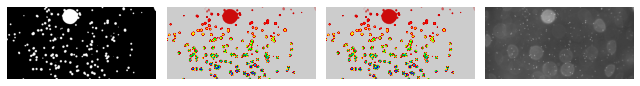

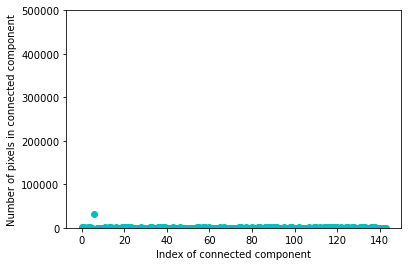

image-cropped-rescaled-20201002-132522-2
20000


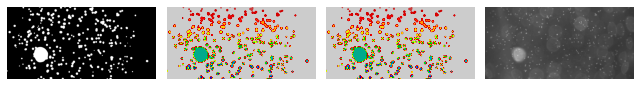

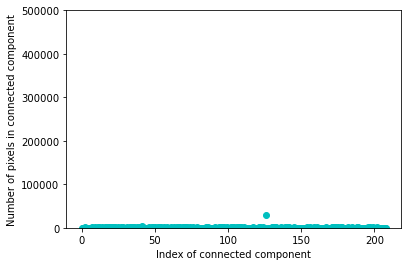

image-cropped-rescaled-20201002-132522-3
20000


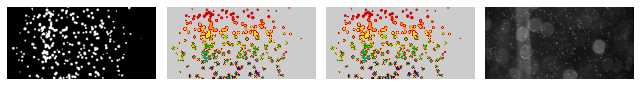

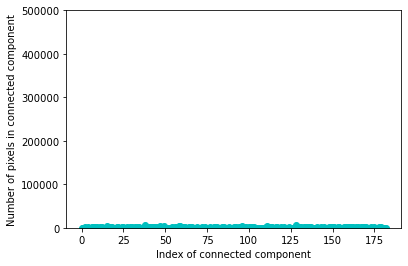

image-cropped-rescaled-20201002-132522-4
20000


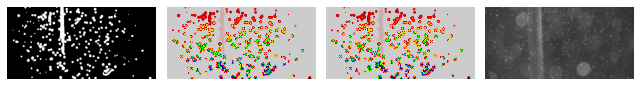

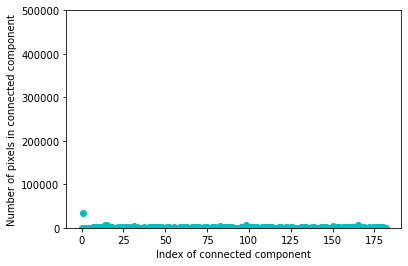

image-cropped-rescaled-20201002-132522-6
20000


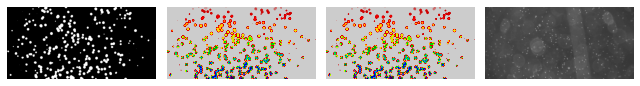

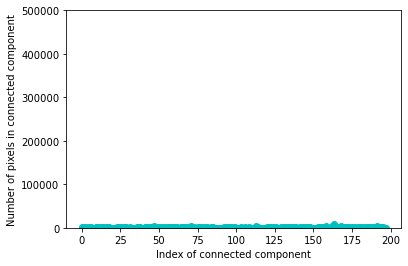

image-cropped-rescaled-20201002-132522-7
20000


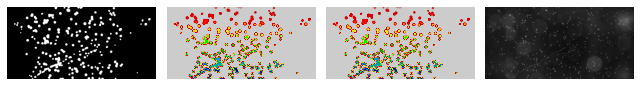

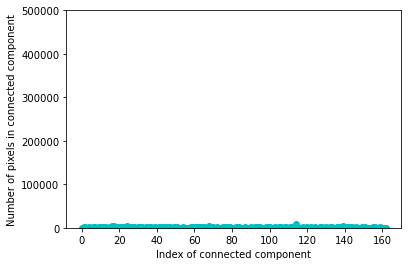

image-cropped-rescaled-20201002-133942-1
20000


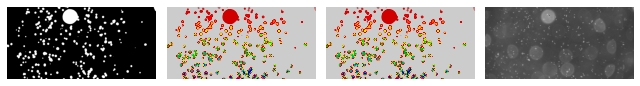

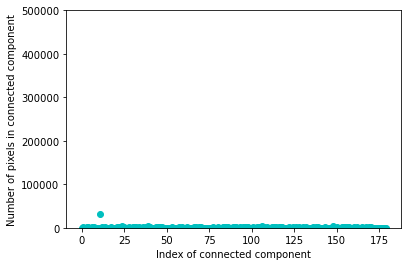

image-cropped-rescaled-20201002-133942-2
20000


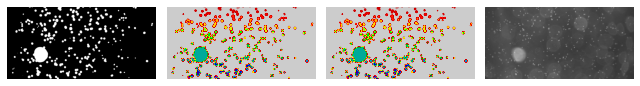

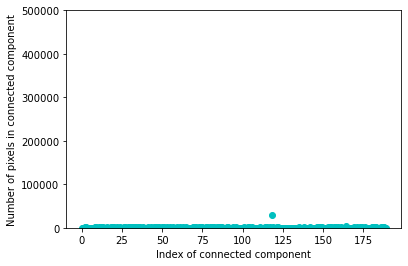

image-cropped-rescaled-20201002-133942-3
20000


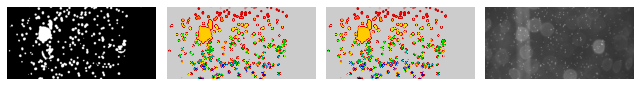

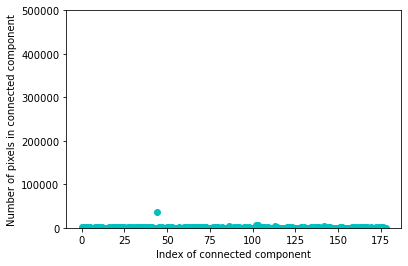

image-cropped-rescaled-20201002-133942-4
20000


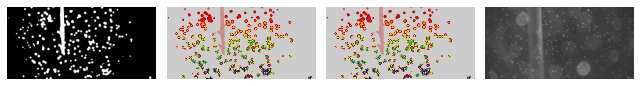

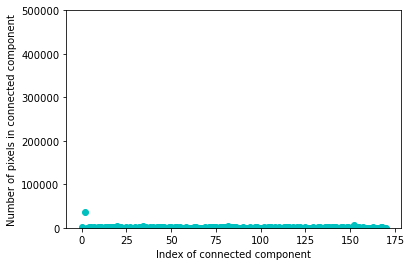

image-cropped-rescaled-20201002-135404-1
20000


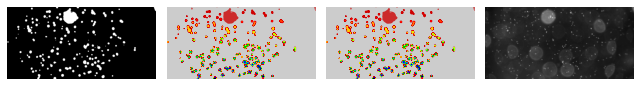

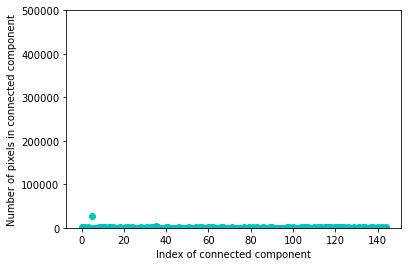

image-cropped-rescaled-20201002-135404-2
20000


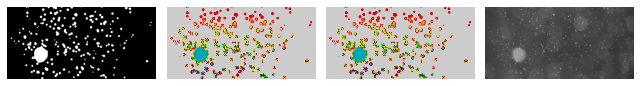

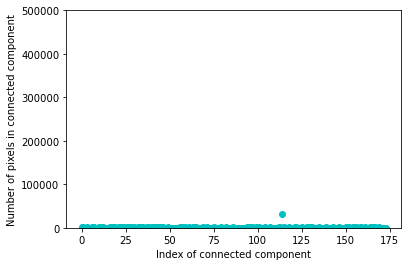

image-cropped-rescaled-20201002-135404-3
20000


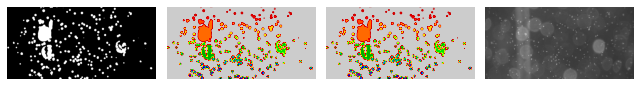

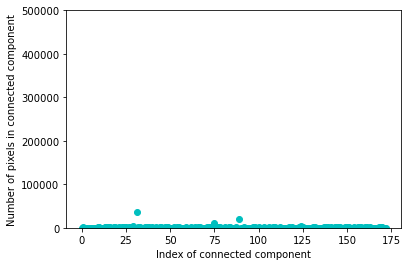

image-cropped-rescaled-20201002-135404-4
20000


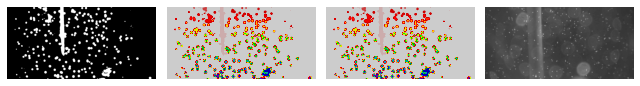

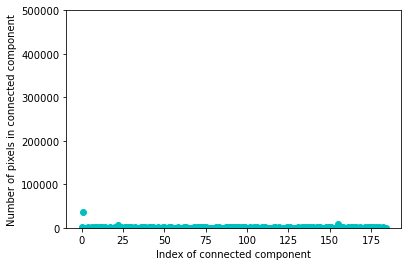

image-cropped-rescaled-20201002-135404-5
20000


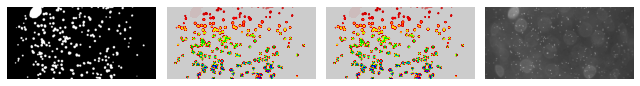

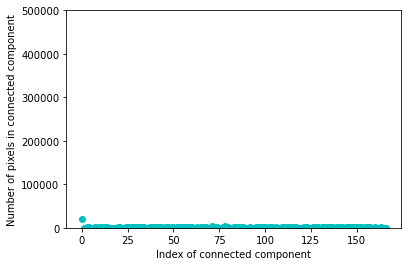

image-cropped-rescaled-20201002-135404-6
20000


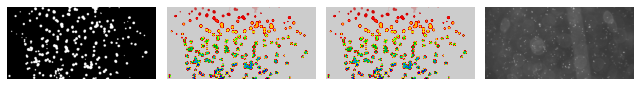

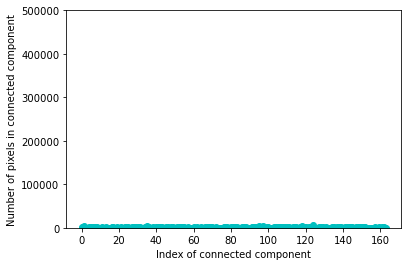

image-cropped-rescaled-20201002-135404-7
20000


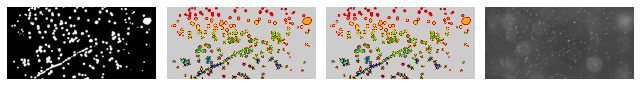

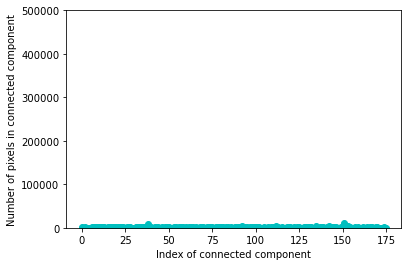

image-cropped-rescaled-20201002-140824-1
20000


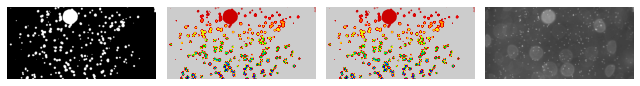

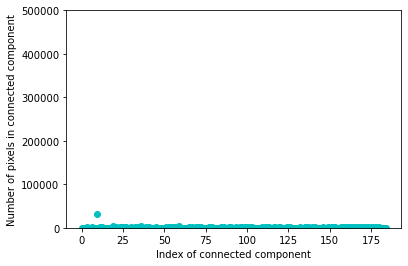

image-cropped-rescaled-20201002-140824-2
20000


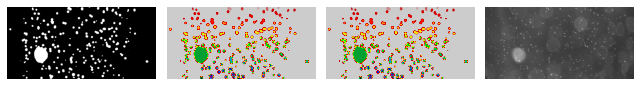

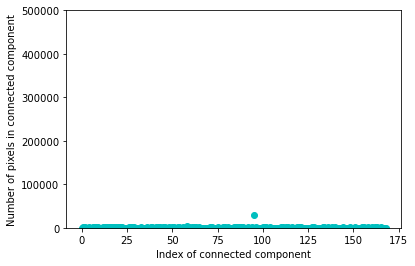

image-cropped-rescaled-20201002-140824-4
20000


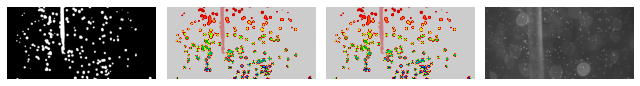

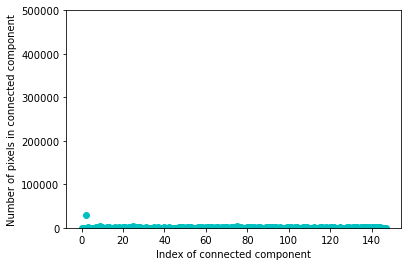

image-cropped-rescaled-20201002-142245-2
20000


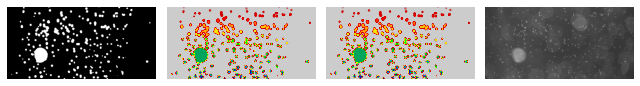

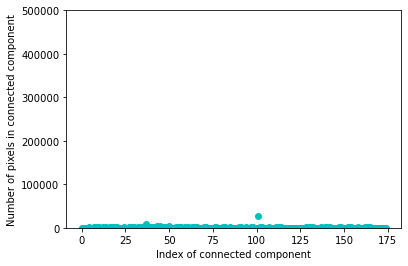

image-cropped-rescaled-20201002-142245-3
20000


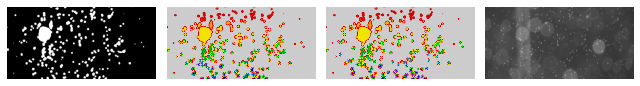

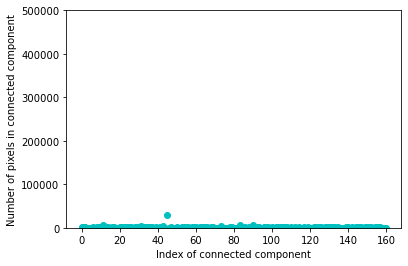

image-cropped-rescaled-20201002-142245-4
20000


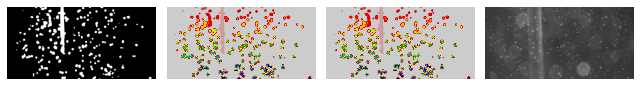

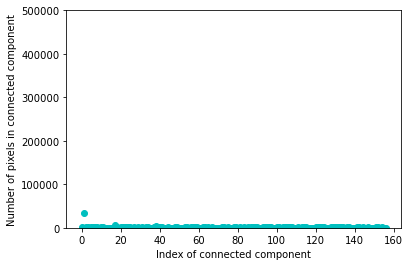

image-cropped-rescaled-20201002-142245-6
20000


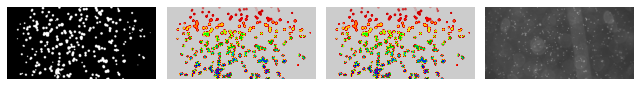

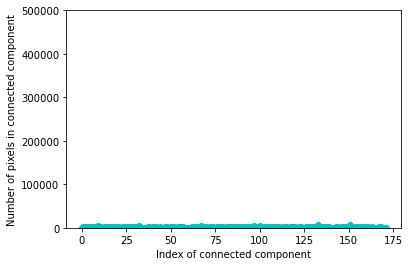

image-cropped-rescaled-20201002-143706-5
20000


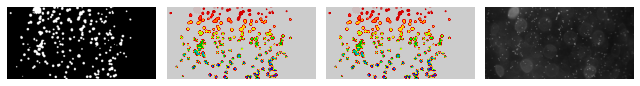

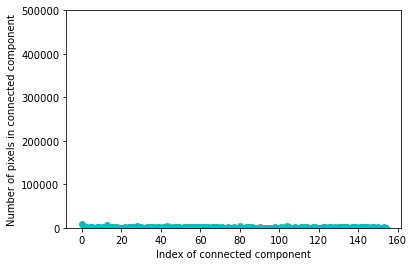

image-cropped-rescaled-20201002-145125-0
20000


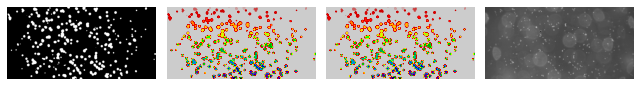

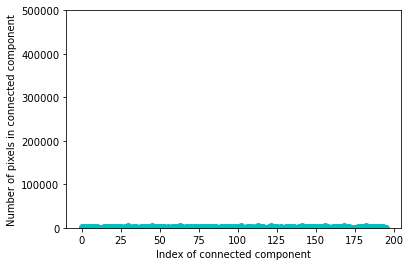

image-cropped-rescaled-20201002-145125-3
20000


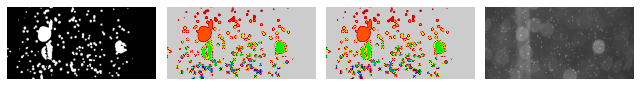

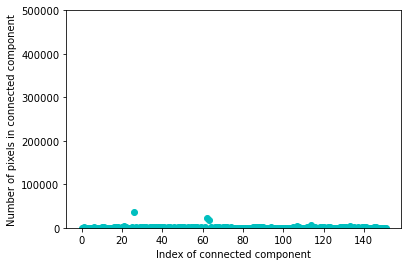

image-cropped-rescaled-20201002-145125-4
20000


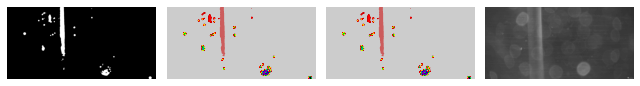

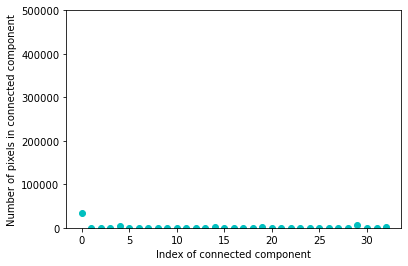

image-cropped-rescaled-20201002-145125-5
20000


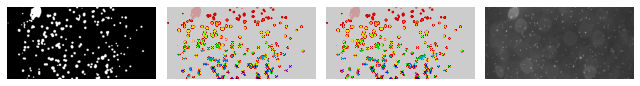

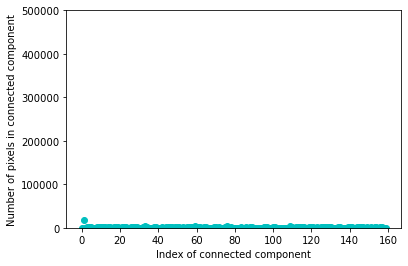

image-cropped-rescaled-20201002-150536-1
20000


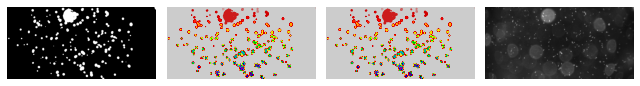

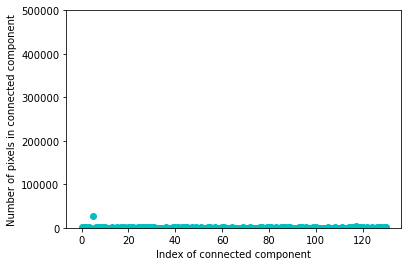

image-cropped-rescaled-20201002-150536-4
20000


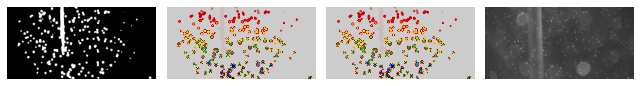

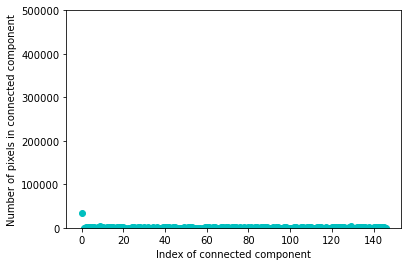

image-cropped-rescaled-20201002-150536-6
20000


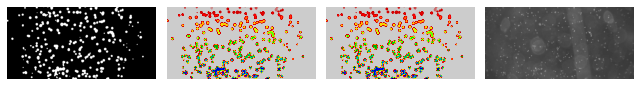

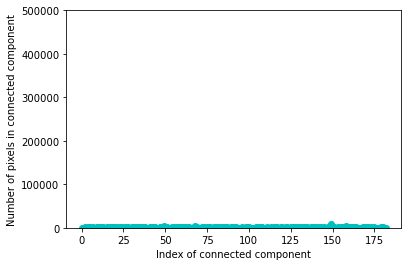

image-cropped-rescaled-20201002-150536-7
20000


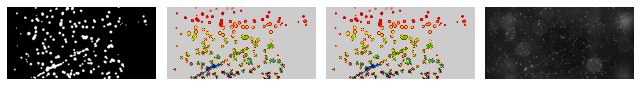

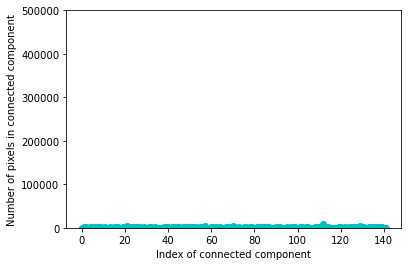

In [84]:
for name in names:
    im_raw = imread('./all_test_images/%s.tif' % name)
    print('\n--------------------\n', name)
    intensity_thresh = 20000
    print(intensity_thresh)
    binary = im_raw > intensity_thresh
    im = filters.gaussian(binary, sigma= l / (4. * n))
    blobs = im > 0.7 * im.mean()
    all_labels = measure.label(blobs)
    blobs_labels = measure.label(blobs, background=0)

    plt.figure(figsize=(9, 3.5))
    plt.subplot(141)
    plt.imshow(blobs, cmap='gray')
    plt.axis('off')
    plt.subplot(142)
    plt.imshow(all_labels, cmap='nipy_spectral_r')
    plt.axis('off')
    plt.subplot(143)
    plt.imshow(blobs_labels, cmap='nipy_spectral_r')
    plt.axis('off')
    plt.subplot(144)
    plt.imshow(im_raw, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    unique, counts = np.unique(blobs_labels, return_counts=True)
    color = 'm' if name in bubble_image_names else 'c'
    title = 'Image contains bubble' if name in bubble_image_names else 'Image does not contain bubble'
    plt.scatter(range(len(counts)-1), counts[1:], color=color)
    plt.xlabel('Index of connected component')
    plt.ylabel('Number of pixels in connected component')
    plt.ylim(0, 500000)
    plt.show()

# Test: identifying bubble images
 
Using the manually defined intensity threshold for binarization and connected component size threshold for identification of bubbles, we are able to identify which images have bubbles.

image-cropped-rescaled-20200901-193536-2


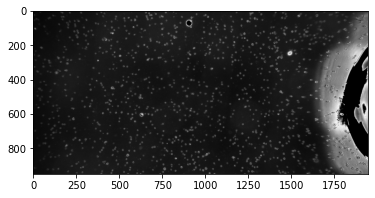

image-cropped-rescaled-20200916-192532-4


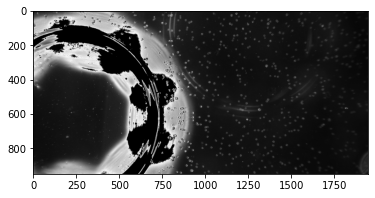

image-cropped-rescaled-20201002-131101-4


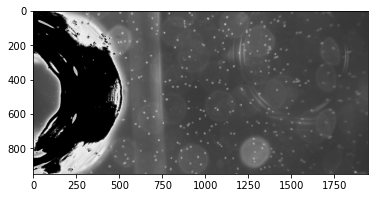

In [22]:
intensity_thresh = 20000  # manually determined, based on this dataset
size_thresh = 100000  # manually determined, based on this dataset
n = 12
l = 256
for name in names:
    im_raw = imread('./all_test_images/%s.tif' % name)
    binary = im_raw > intensity_thresh
    im = filters.gaussian(binary, sigma= l / (4. * n))
    blobs = im > 0.7 * im.mean()
    all_labels = measure.label(blobs)
    blobs_labels = measure.label(blobs, background=0)
    unique, counts = np.unique(blobs_labels, return_counts=True)
    counts = list(counts)
    counts.remove(max(counts))
    if any(i >= size_thresh for i in counts):
        print(name)
        plt.imshow(im_raw, cmap='gray')
        plt.show()

In [24]:
bubble_image_names

['image-cropped-rescaled-20200901-193536-2',
 'image-cropped-rescaled-20200916-192532-4',
 'image-cropped-rescaled-20201002-131101-4']

# Sandbox

### Looking for large connected components after binarizing using Otsu's method threshold

Observation: This results in thresholds that are too low-intensity for images which have aberrations but are low-intensity overall, so the aberrations show up as large blobs and get detected as the major connected components.

In [85]:
for name in names:
    im_raw = imread('./all_test_images/%s.tif' % name)
    print(name)
    thresh = threshold_otsu(im_raw)
    print(thresh)
    binary = im_raw > thresh
    im = filters.gaussian(binary, sigma= l / (4. * n))
    blobs = im > 0.7 * im.mean()
    all_labels = measure.label(blobs)
    blobs_labels = measure.label(blobs, background=0)

    plt.figure(figsize=(9, 3.5))
    plt.subplot(141)
    plt.imshow(blobs, cmap='gray')
    plt.axis('off')
    plt.subplot(142)
    plt.imshow(all_labels, cmap='nipy_spectral_r')
    plt.axis('off')
    plt.subplot(143)
    plt.imshow(blobs_labels, cmap='nipy_spectral_r')
    plt.axis('off')
    plt.subplot(144)
    plt.imshow(im_raw, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    unique, counts = np.unique(blobs_labels, return_counts=True)
    color = 'm' if name in bubble_image_names else 'c'
    
    plt.scatter(range(len(counts)-1), counts[1:], color=color)
    plt.ylabel('Number of pixels in connected component')
    plt.ylim(0, 2e6)
    plt.show()

### Binarizing the image using Otsu's method

Observation: This results in thresholds that are too low-intensity for images which have aberrations but are low-intensity overall.

image-cropped-rescaled-20200901-193536-0


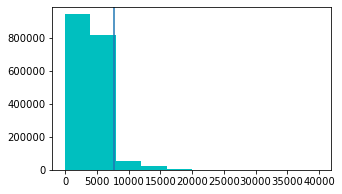

image-cropped-rescaled-20200901-193536-2


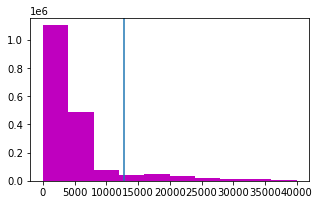

image-cropped-rescaled-20200901-193823-1


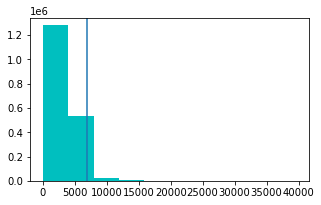

image-cropped-rescaled-20200901-193823-2


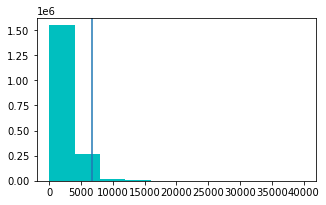

image-cropped-rescaled-20200901-193823-3


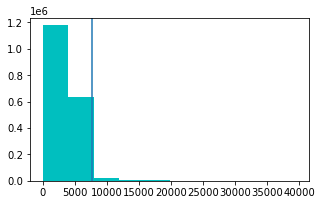

image-cropped-rescaled-20200901-193823-5


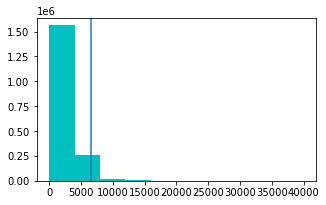

image-cropped-rescaled-20200901-193823-6


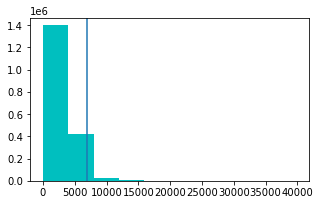

image-cropped-rescaled-20200901-194109-1


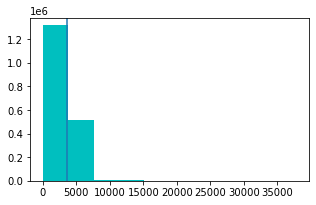

image-cropped-rescaled-20200901-194109-2


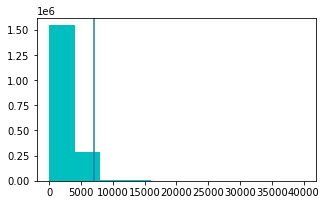

image-cropped-rescaled-20200901-194109-3


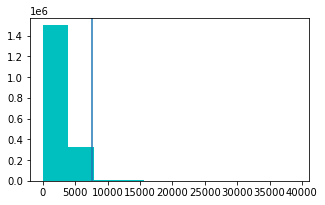

image-cropped-rescaled-20200901-194109-6


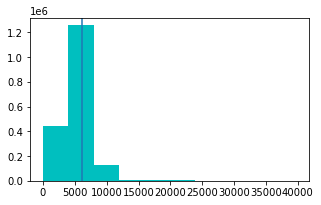

image-cropped-rescaled-20200901-194109-7


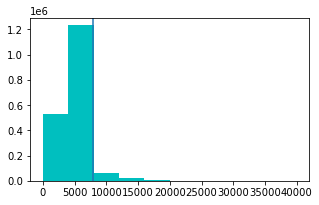

image-cropped-rescaled-20200901-194356-2


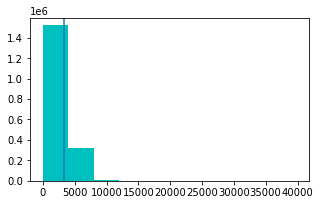

image-cropped-rescaled-20200901-194356-3


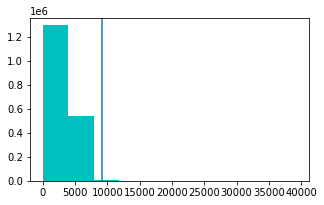

image-cropped-rescaled-20200901-194356-5


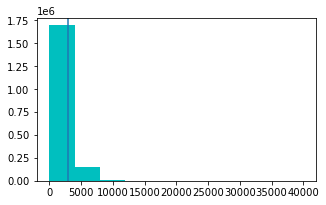

image-cropped-rescaled-20200901-194356-6


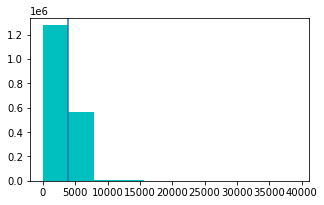

image-cropped-rescaled-20200916-192246-5


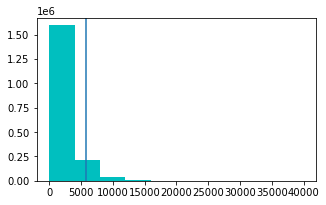

image-cropped-rescaled-20200916-192532-1


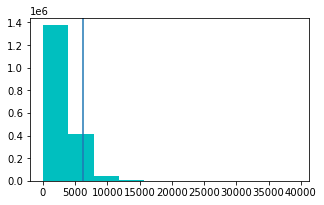

image-cropped-rescaled-20200916-192532-2


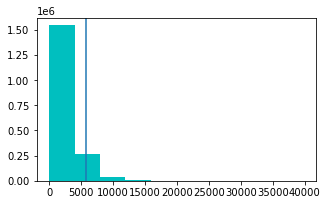

image-cropped-rescaled-20200916-192532-4


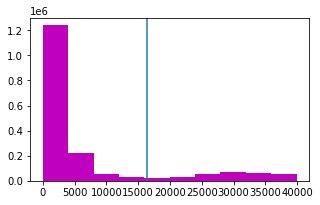

image-cropped-rescaled-20200916-192532-7


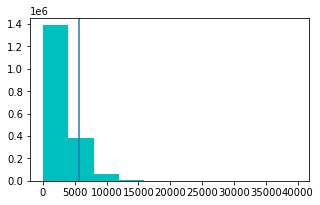

image-cropped-rescaled-20200916-200538-0


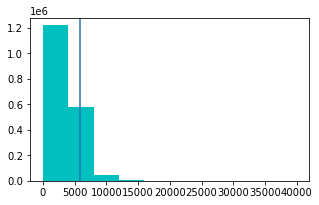

image-cropped-rescaled-20200916-200538-7


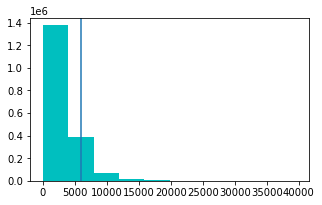

image-cropped-rescaled-20200916-200824-5


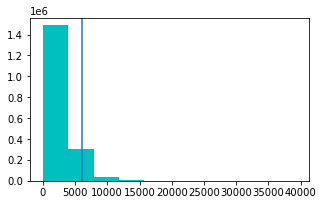

image-cropped-rescaled-20200916-201111-5


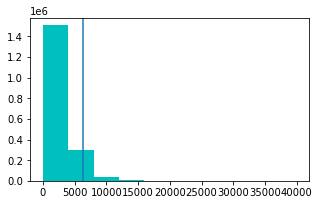

image-cropped-rescaled-20200916-201111-6


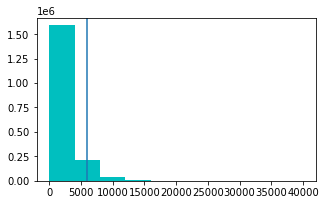

image-cropped-rescaled-20201002-125630-0


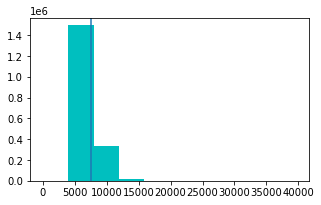

image-cropped-rescaled-20201002-125630-1


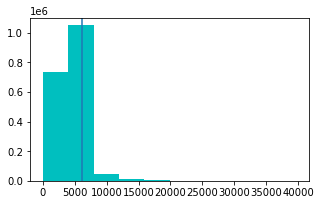

image-cropped-rescaled-20201002-125630-2


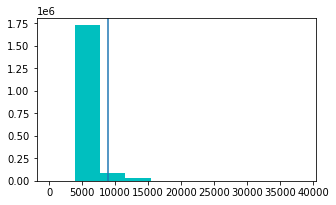

image-cropped-rescaled-20201002-125630-3


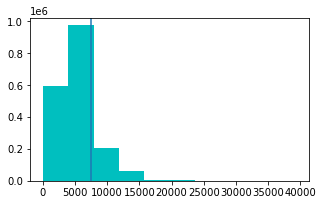

image-cropped-rescaled-20201002-125630-4


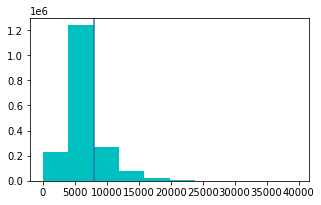

image-cropped-rescaled-20201002-125630-5


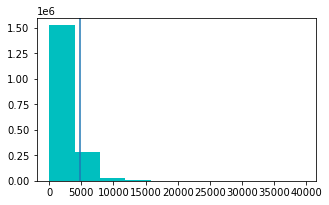

image-cropped-rescaled-20201002-125630-7


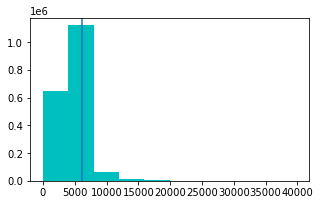

image-cropped-rescaled-20201002-131101-1


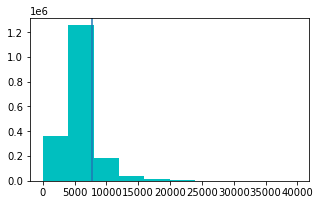

image-cropped-rescaled-20201002-131101-2


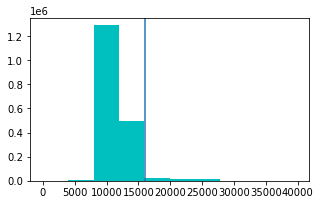

image-cropped-rescaled-20201002-131101-3


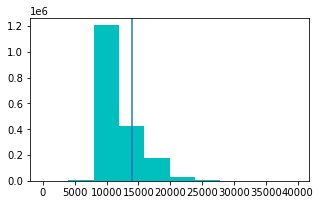

image-cropped-rescaled-20201002-131101-4


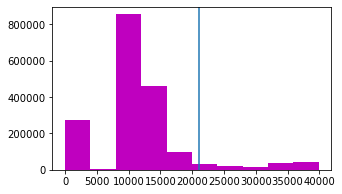

image-cropped-rescaled-20201002-131101-7


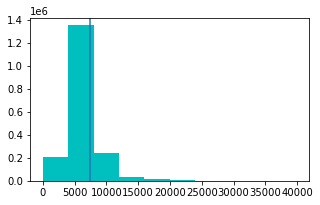

image-cropped-rescaled-20201002-132522-1


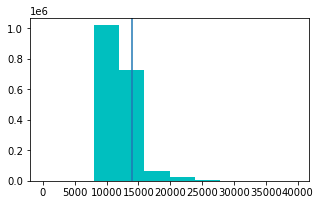

image-cropped-rescaled-20201002-132522-2


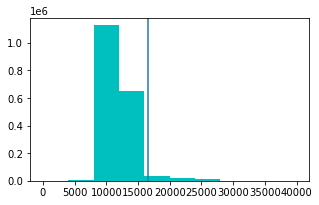

image-cropped-rescaled-20201002-132522-3


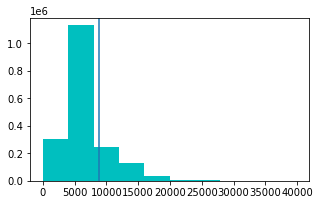

image-cropped-rescaled-20201002-132522-4


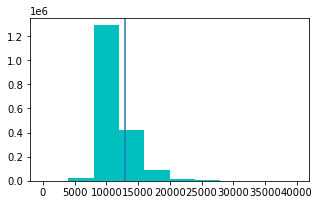

image-cropped-rescaled-20201002-132522-6


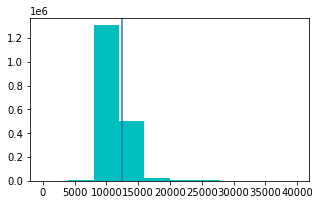

image-cropped-rescaled-20201002-132522-7


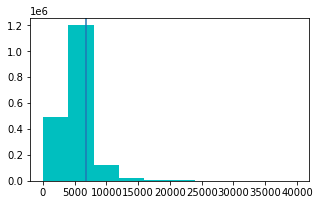

image-cropped-rescaled-20201002-133942-1


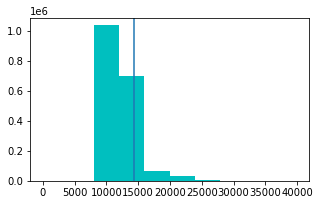

image-cropped-rescaled-20201002-133942-2


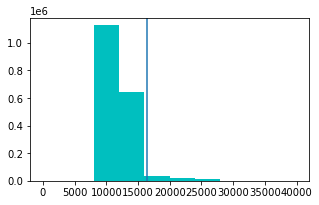

image-cropped-rescaled-20201002-133942-3


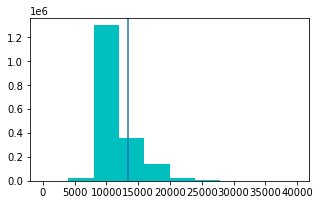

image-cropped-rescaled-20201002-133942-4


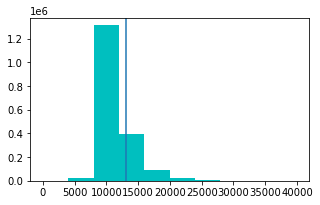

image-cropped-rescaled-20201002-135404-1


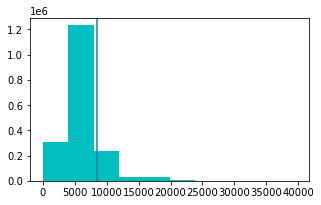

image-cropped-rescaled-20201002-135404-2


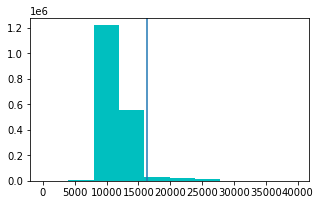

image-cropped-rescaled-20201002-135404-3


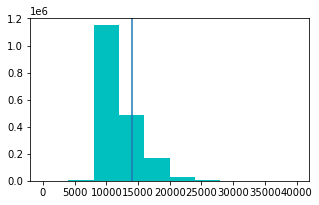

image-cropped-rescaled-20201002-135404-4


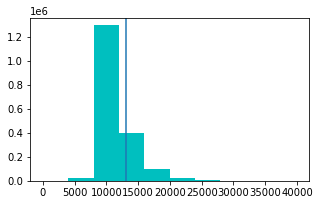

image-cropped-rescaled-20201002-135404-5


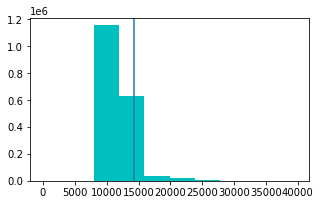

image-cropped-rescaled-20201002-135404-6


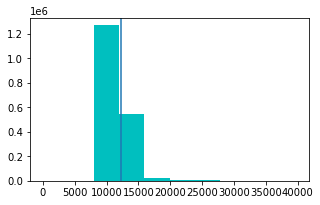

image-cropped-rescaled-20201002-135404-7


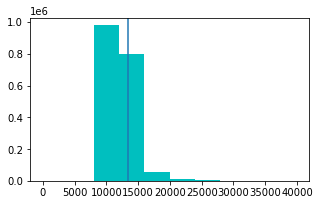

image-cropped-rescaled-20201002-140824-1


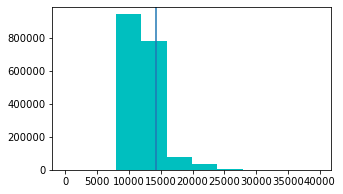

image-cropped-rescaled-20201002-140824-2


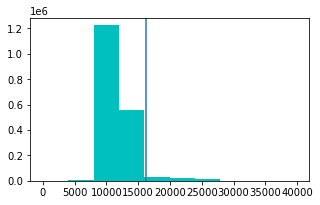

image-cropped-rescaled-20201002-140824-4


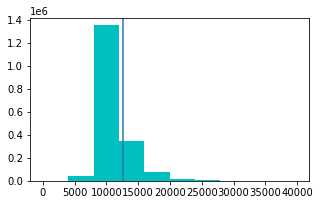

image-cropped-rescaled-20201002-142245-2


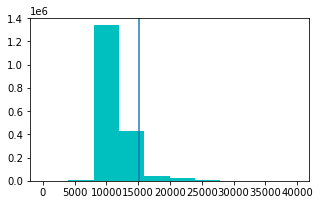

image-cropped-rescaled-20201002-142245-3


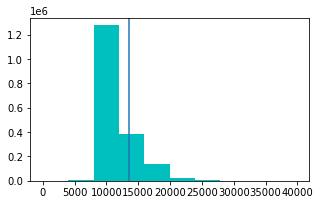

image-cropped-rescaled-20201002-142245-4


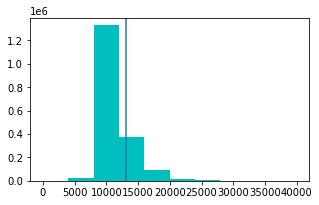

image-cropped-rescaled-20201002-142245-6


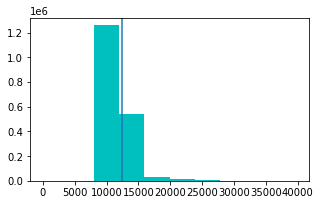

image-cropped-rescaled-20201002-143706-5


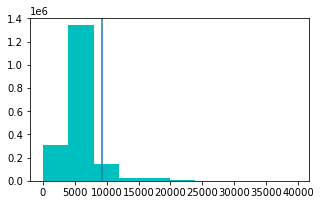

image-cropped-rescaled-20201002-145125-0


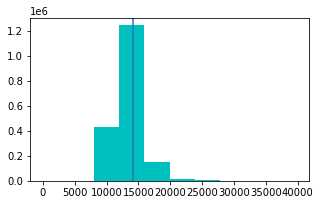

image-cropped-rescaled-20201002-145125-3


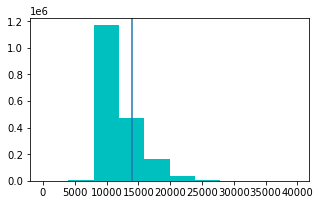

image-cropped-rescaled-20201002-145125-4


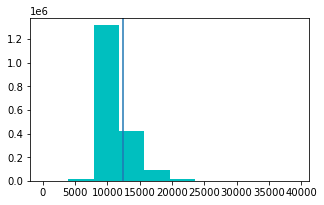

image-cropped-rescaled-20201002-145125-5


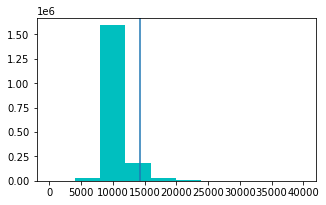

image-cropped-rescaled-20201002-150536-1


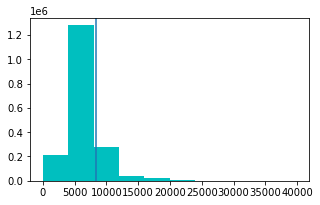

image-cropped-rescaled-20201002-150536-4


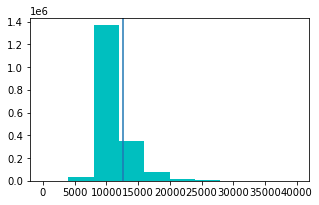

image-cropped-rescaled-20201002-150536-6


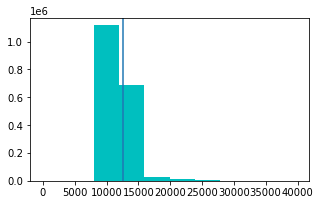

image-cropped-rescaled-20201002-150536-7


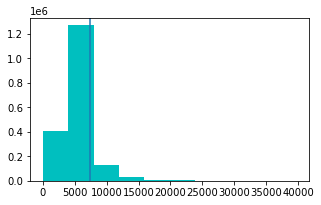

In [23]:
for name in names:
    print(name)
    plt.figure(figsize=(5,3))
    im_raw = imread('./all_test_images/%s.tif' % name)
    color = 'm' if name in bubble_image_names else 'c'
    plt.hist(im_raw.flatten(), color=color)
    thresh = threshold_otsu(im_raw)
    binary = im_raw > thresh
    plt.axvline(thresh)
    plt.show()

### Connected Components Example
From https://scipy-lectures.org/packages/scikit-image/auto_examples/plot_labels.html

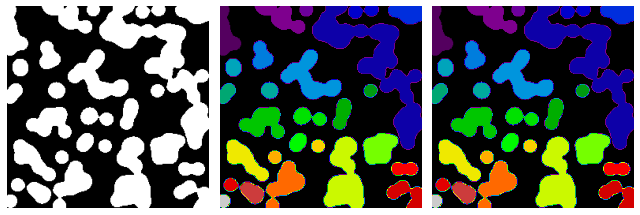

In [2]:
n = 12
l = 256
np.random.seed(1)
im = np.zeros((l, l))
points = l * np.random.random((2, n ** 2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = filters.gaussian(im, sigma= l / (4. * n))
blobs = im > 0.7 * im.mean()

all_labels = measure.label(blobs)
blobs_labels = measure.label(blobs, background=0)

plt.figure(figsize=(9, 3.5))
plt.subplot(131)
plt.imshow(blobs, cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(all_labels, cmap='nipy_spectral')
plt.axis('off')
plt.subplot(133)
plt.imshow(blobs_labels, cmap='nipy_spectral')
plt.axis('off')

plt.tight_layout()
plt.show()